In [1]:
import pandas as pd


import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

def plot_percentage(df, x, y, xlabel):   
    counts = df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    print(counts)
    g = sns.catplot(x=x, y='percent', hue=y, data=counts, kind='bar')
    
    g.set(xlabel = xlabel)
    
    new_title = 'Evasão'
    g._legend.set_title(new_title)
    # replace labels
    new_labels = ['Não', 'Sim']
    for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    plt.show()

def plot_time_bar(col_group, target, title):
    data = df.groupby(['time', col_group]).agg({target:'mean'}).reset_index()
    ax = sns.barplot(x='time', y=target, data=data, hue=col_group)
    ax.set(title=title) 

In [2]:
df = pd.read_csv('/home/ramon/extrator/retencao/retencao.csv')

df = df[df['centro'] == 'CFP']

df.columns


/home/ramon/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,14,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['matricula', 'periodoLetivo', 'n_rep', 'n_repf', 'n_apr', 'n_tra',
       'mediaFinal', 'anoIngresso', 'periodoingresso', 'prazoConclusao',
       'dataColacaoGrau', 'periodoAtual', 'dataIntegralizacao',
       'modalidadeVaga', 'dataConclusao', 'nomeDiscente', 'dataNascimento',
       'sexo', 'raca', 'cpf', 'ufNaturalidade', 'municipioNaturalidade',
       'segundoGrauAnoConclusao', 'tipoEnsinoMedio', 'formaIngresso',
       'statusDiscente', 'codigoInep', 'curso', 'curriculo', 'is_cotista',
       'periodo', 'anoNascimento', 'idade', 'gap', 'centro', 'municipio',
       'turno', 'is_outra_cidade', 'time', 'total', 'p_rep', 'p_repf', 'p_apr',
       'p_tra'],
      dtype='object')

# Q.1 - Sexo afeta a reprovação?

- Homens possuem maiores taxas de reprovação até 8 semestre
- Diferença é estatisticamente significativa com exceção para semestre 4

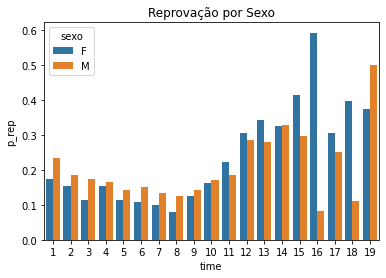

In [3]:
plot_time_bar('sexo', 'p_rep', 'Reprovação por Sexo')   

In [4]:
col = 'sexo'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 'M')

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.00000
2 0.00148
3 0.00000
4 0.26984
5 0.00897
6 0.00036
7 0.00530
8 0.00009
9 0.30498
10 0.68498
11 0.24706
12 0.64221
13 0.27472
14 0.97172
15 0.35697
16 0.00289
17 0.75202
18 0.30626
19 0.80417


# Q.2 - Forma de Ingresso (cotista ou ampla concorrência) impacta a reprovação?

- Cotistas possuem maior taxa de reprovação no 1o semestre
- A diferença é estatisticamente significativa

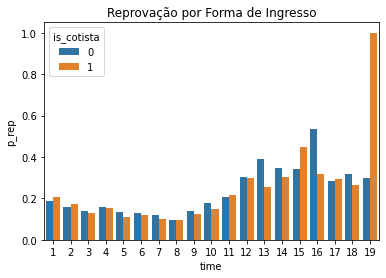

In [5]:
plot_time_bar('is_cotista', 'p_rep', 'Reprovação por Forma de Ingresso')   

In [6]:
col = 'is_cotista'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 1)

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.02681
2 0.20035
3 0.21713
4 0.59814
5 0.01708
6 0.33348
7 0.07215
8 0.77302
9 0.28481
10 0.16295
11 0.81225
12 0.83532
13 0.00974
14 0.55575
15 0.34284
16 0.19214
17 0.95458
18 0.85594
19 nan


/home/ramon/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/ramon/.local/lib/python3.6/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Q.3 - Cidade de origem impacta a reprovação?

- Não há evidências

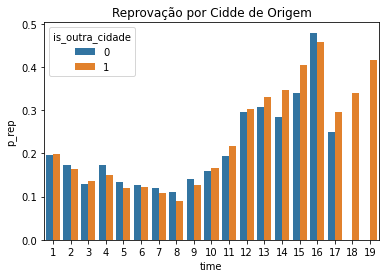

In [7]:
plot_time_bar('is_outra_cidade', 'p_rep', 'Reprovação por Cidde de Origem')   

In [8]:
col = 'is_outra_cidade'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 1)

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.77788
2 0.40219
3 0.38758
4 0.04459
5 0.20803
6 0.59787
7 0.31967
8 0.07147
9 0.39902
10 0.69497
11 0.45519
12 0.89851
13 0.67545
14 0.46399
15 0.58649
16 0.90641
17 0.81255
18 nan
19 nan


# Q.4 - Período de Ingresso (1o ou 2o edição do SISU) impacta a reprovação?

- No 1o semestre do curso, discentes que ingressam na 1a edição do SISU possue maior taxa de reprovação
- A diferença é estatisticamente significativa

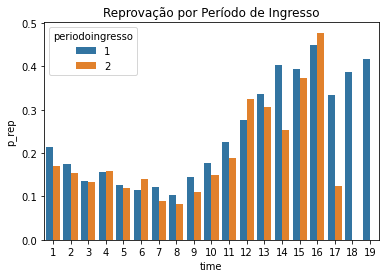

In [9]:
plot_time_bar('periodoingresso', 'p_rep', 'Reprovação por Período de Ingresso')   

In [10]:
col = 'periodoingresso'

for time in df.time.unique():

    idx_time = (df.time == time) 
    idx_cat= (df[col] == 1)

    x = df.loc[(idx_time) & (idx_cat), 'p_rep'].values
    y = df.loc[(idx_time) & (~idx_cat), 'p_rep'].values



    from scipy import stats
    print('%d %.5f'%(time, stats.ttest_ind(x, y)[1]))

1 0.00000
2 0.02987
3 0.80447
4 0.77515
5 0.55160
6 0.03332
7 0.00620
8 0.06197
9 0.02651
10 0.16751
11 0.20270
12 0.22492
13 0.57777
14 0.05391
15 0.85114
16 0.86343
17 0.27197
18 0.21221
19 nan


# Q5 - Taxa de reprovação decresce com o tempo?

- Taxa de reprovação tende a decrescer até o 8o semestre

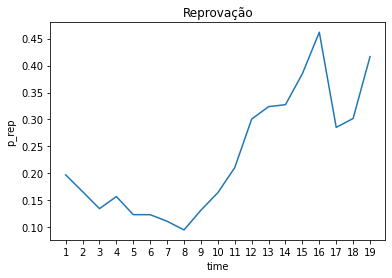

In [11]:
data = df.groupby('time').agg({'p_rep':'mean'}).reset_index()

ax = sns.lineplot(x='time', y='p_rep', data=data)    
ax.set(title='Reprovação')

ax.set_xticks(df['time'].unique())

# Q6 - A idade de ingresso afeta a taxa de reprovação no 1o semestre?

- Não há evidências

              p_rep
idade_cat          
(0, 20]    0.186872
(20, 25]   0.202639
(25, 30]   0.201166
(30, 50]   0.202332
(50, 100]  0.325463


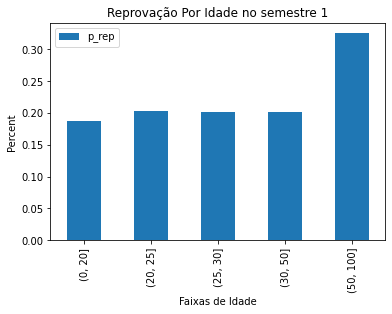

In [12]:
col = 'idade_cat'
df[col] = pd.cut(df.idade, bins=[0,20,25,30,50,100])

for idx, _df in df.groupby(['time']):
    
    data = _df.groupby(col).agg({'p_rep' : 'mean'})
    print(data)
    ax = data.plot.bar()
    ax.set(ylabel="Percent")
    ax.set(title='Reprovação Por Idade no semestre %d'%(idx), xlabel='Faixas de Idade')
    plt.show()
    break